In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
payments = pd.read_csv("./hw3data/payments.csv")
merchants = pd.read_csv("./hw3data/merchants.csv")
buyers = pd.read_csv("./hw3data/buyers.csv")

In [3]:
data = pd.merge(payments, merchants, left_on='merchant_id', right_on='id', how='inner')

In [4]:
data = pd.merge(data, buyers, left_on='buyer_id', right_on='id', how='inner')

In [5]:
data = data.drop(columns=["id_y","id"])
data = data.rename(columns={'country_x': 'MerchantCountry', 'country_y': 'BuyerCountry'})
data = data.sort_values(by='transaction_timestamp', ascending=True)
data

,id_x,merchant_id,buyer_id,transaction_timestamp,payment_amount,chargeback_timestamp,MerchantCountry,category,BuyerCountry
4017,b3616382-7795-4939-a499-634286a59720,8e6db705-59c3-4791-ac35-8a73e6402851,eab8e841-8b3c-4db8-a811-0406d0d01938,2023-01-01 00:32:59,210,NaN,CA,lodging,MX
5789,3dce43bb-25af-46c3-be26-7f987302432c,b944baa7-a19b-45b1-968e-8a1c717d466c,7ae57573-d9f5-4acd-bb94-de4c3c54a6f2,2023-01-01 00:37:57,766,NaN,US,lodging,CA
17377,b6055f55-ec64-4fdd-a132-a0b673f8dbed,4a708de9-cb1b-4b41-bbbf-ad3e1b90499f,1d418d12-e2b3-4a89-a91b-8ae1a0e2f716,2023-01-01 00:56:44,942,NaN,US,transportation,MX
13155,15ac3d47-4dea-4be6-bff4-db61f11c4ee1,f8a46028-4785-49c9-abfa-e84a24c82d21,4fa9235d-d2cc-4915-bbe4-18596d94e600,2023-01-01 01:11:50,1214,2023-01-03 23:39:25.808903,MX,contract_service,MX
8581,1b8ab70a-d08c-4606-8b3a-b1937ba0fc15,2dee211d-b388-4d3b-a12a-ede78e2e0633,d07e1ef1-efed-41ea-91d2-a112894aba2f,2023-01-01 01:34:30,1725,NaN,US,utility,MX
...,...,...,...,...,...,...,...,...,...
10642,360f951e-05a9-4e4a-b8fd-c07e2360eb0c,09f201b4-eb59-4535-9c21-fee40173e031,0af4f4ee-86f0-4b05-a2a4-bd04518cd1e8,2023-10-17 21:55:08,8996,NaN,MX,contract_service,MX
11487,52acfeed-e711-400d-af6a-ce11495615f2,a48a8b08-1314-426c-9310-051f5739be7f,560e8a8a-8c07-4761-84a7-5d2b6fa64064,2023-10-17 22:58:20,968,NaN,US,lodging,MX
7349,72259f9c-253c-422f-94f5-ebfd5bcaf13e,a48a8b08-1314-426c-9310-051f5739be7f,59ba13b7-453a-433d-98ec-a56e73bdb311,2023-10-17 23:16:50,894,NaN,US,lodging,CA
2950,4599508f-25af-4e3d-9b20-d6b78196d6d0,f41ab8b5-9fd6-4d63-8272-b44dbf3087b8,2734fc9e-94db-4e1d-893e-3c0818ada55b,2023-10-17 23:17:55,1958,2023-11-21 01:39:23.326748,CA,agricultural,MX


# 1. Chargebacks

In [6]:
fraudulent_payments = payments[~payments['chargeback_timestamp'].isnull()]

fraudulent_payments['day_diff'] = (pd.to_datetime(fraudulent_payments['chargeback_timestamp']) - pd.to_datetime(fraudulent_payments['transaction_timestamp'])).dt.days

fraudulent_payments.sort_values(by='day_diff', inplace=True)

# Calculate the waiting time for 95% of payments to have received a chargeback
percentile = 95
waiting_time = np.percentile(fraudulent_payments['day_diff'], percentile)

print("Waiting days for 95% of all payments to have received a chargeback:", waiting_time)


Waiting days for 95% of all payments to have received a chargeback: 30.0


/var/folders/2g/7lpyz7fd0_b15m4fm3mwbbd00000gn/T/ipykernel_87688/1226915324.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraudulent_payments['day_diff'] = (pd.to_datetime(fraudulent_payments['chargeback_timestamp']) - pd.to_datetime(fraudulent_payments['transaction_timestamp'])).dt.days
/Users/cameronwalcott/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# 2. Train / Test Split

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
data['category'] = label_encoder.fit_transform(data['category'])
data['MerchantCountry'] = label_encoder.fit_transform(data['MerchantCountry'])
data['BuyerCountry'] = label_encoder.fit_transform(data['BuyerCountry'])
data

,id_x,merchant_id,buyer_id,transaction_timestamp,payment_amount,chargeback_timestamp,MerchantCountry,category,BuyerCountry
4017,b3616382-7795-4939-a499-634286a59720,8e6db705-59c3-4791-ac35-8a73e6402851,eab8e841-8b3c-4db8-a811-0406d0d01938,2023-01-01 00:32:59,210,NaN,0,6,1
5789,3dce43bb-25af-46c3-be26-7f987302432c,b944baa7-a19b-45b1-968e-8a1c717d466c,7ae57573-d9f5-4acd-bb94-de4c3c54a6f2,2023-01-01 00:37:57,766,NaN,2,6,0
17377,b6055f55-ec64-4fdd-a132-a0b673f8dbed,4a708de9-cb1b-4b41-bbbf-ad3e1b90499f,1d418d12-e2b3-4a89-a91b-8ae1a0e2f716,2023-01-01 00:56:44,942,NaN,2,8,1
13155,15ac3d47-4dea-4be6-bff4-db61f11c4ee1,f8a46028-4785-49c9-abfa-e84a24c82d21,4fa9235d-d2cc-4915-bbe4-18596d94e600,2023-01-01 01:11:50,1214,2023-01-03 23:39:25.808903,1,5,1
8581,1b8ab70a-d08c-4606-8b3a-b1937ba0fc15,2dee211d-b388-4d3b-a12a-ede78e2e0633,d07e1ef1-efed-41ea-91d2-a112894aba2f,2023-01-01 01:34:30,1725,NaN,2,9,1
...,...,...,...,...,...,...,...,...,...
10642,360f951e-05a9-4e4a-b8fd-c07e2360eb0c,09f201b4-eb59-4535-9c21-fee40173e031,0af4f4ee-86f0-4b05-a2a4-bd04518cd1e8,2023-10-17 21:55:08,8996,NaN,1,5,1
11487,52acfeed-e711-400d-af6a-ce11495615f2,a48a8b08-1314-426c-9310-051f5739be7f,560e8a8a-8c07-4761-84a7-5d2b6fa64064,2023-10-17 22:58:20,968,NaN,2,6,1
7349,72259f9c-253c-422f-94f5-ebfd5bcaf13e,a48a8b08-1314-426c-9310-051f5739be7f,59ba13b7-453a-433d-98ec-a56e73bdb311,2023-10-17 23:16:50,894,NaN,2,6,0
2950,4599508f-25af-4e3d-9b20-d6b78196d6d0,f41ab8b5-9fd6-4d63-8272-b44dbf3087b8,2734fc9e-94db-4e1d-893e-3c0818ada55b,2023-10-17 23:17:55,1958,2023-11-21 01:39:23.326748,0,0,1


In [8]:
waiting_time = 30

data['transaction_timestamp'] = pd.to_datetime(payments['transaction_timestamp'])

end_test = data['transaction_timestamp'].max()

start_test = end_test - pd.Timedelta(days=30)


train = data[
    (pd.to_datetime(data['transaction_timestamp']) + pd.DateOffset(days=waiting_time)) <= start_test
]


test = data[
    (pd.to_datetime(data['transaction_timestamp']) >= start_test) &
    (pd.to_datetime(data['transaction_timestamp']) <= end_test)
]

# Print the start and end timestamps for the training and test datasets
print("Training dataset start timestamp:", train['transaction_timestamp'].min())
print("Training dataset end timestamp:", train['transaction_timestamp'].max())
print("Test dataset start timestamp:", test['transaction_timestamp'].min())
print("Test dataset end timestamp:", test['transaction_timestamp'].max())


Training dataset start timestamp: 2023-01-01 00:32:59
Training dataset end timestamp: 2023-08-18 23:28:09
Test dataset start timestamp: 2023-09-18 00:04:38
Test dataset end timestamp: 2023-10-17 23:46:55


In [9]:
train = train.sort_values(by='transaction_timestamp', ascending=True)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)
train

,id_x,merchant_id,buyer_id,transaction_timestamp,payment_amount,chargeback_timestamp,MerchantCountry,category,BuyerCountry
0,8fb32849-1db9-4019-aac8-0ff322eb99b0,03f279a4-b894-4eb4-ac32-682688b41726,1708319f-dcc2-4cef-b0af-e3822fdb71ea,2023-01-01 00:32:59,847,NaN,2,3,1
1,f0c55fd9-f12f-480f-b00c-ae741b9ee582,2a3a7198-c785-49dc-8183-d7685bff23f6,48aacae0-b0cd-4268-8334-fa939034c50d,2023-01-01 00:37:57,14906,NaN,0,7,2
2,29e9aea7-1071-4eb9-9fd1-be92c9a0d3fc,2dee211d-b388-4d3b-a12a-ede78e2e0633,dfa6ce3f-0532-4ff9-be7a-6f9432bfd50a,2023-01-01 00:56:44,1166,2023-01-25 16:30:33.899264,2,9,1
3,6f2073ef-be69-4390-bd13-defa374a6cb3,db13e6cb-6f56-4362-b18f-76e4a04788f7,c93f473b-6a73-4280-a886-ba345e945630,2023-01-01 01:11:50,1921,NaN,2,0,2
4,01ac25be-34ab-4c5a-8576-5e90f772cb5b,db13e6cb-6f56-4362-b18f-76e4a04788f7,dc6a010c-c656-43e6-a8d9-272035cb7d2a,2023-01-01 01:34:30,3832,NaN,2,0,1
...,...,...,...,...,...,...,...,...,...
15848,dfb55247-258a-4d71-9645-3ec673506e23,f8eb9a6a-5ba7-45d2-8d7d-fff30890e68b,774cb9b5-92d7-4147-9ac1-5d88032be960,2023-08-18 22:35:42,801,NaN,2,1,1
15849,43fabf74-bfa9-4437-b0b2-8f8b28faec09,41730a5e-691c-4aaa-8188-f4de0f5950e9,4211bbf2-c076-4b88-82c0-649b127edff4,2023-08-18 22:54:40,430,NaN,2,3,1
15850,c287fe80-861d-45d8-9773-d9e670f00581,8e6db705-59c3-4791-ac35-8a73e6402851,c7690bc3-2294-4d3c-a340-32da386f3f2c,2023-08-18 23:09:36,271,NaN,0,6,0
15851,6c41e02f-7ea8-482c-8fbe-cd01cf85df7c,c58d51ee-2230-46a7-a883-33465c8f5951,8cc9f5b5-85cd-4856-a427-2b723da80e56,2023-08-18 23:12:58,26666,2023-10-06 09:49:46.875623,2,9,1


# 3. Historical Features

In [10]:
def calculate_historical_features(data):
    merchant_transaction_counts = {}
    buyer_transaction_counts = {}

    fraud_rates = {
        "MerchantFraudRate": [],
        "BuyerFraudRate": []
    }

    # Iterate through each payment
    for _, payment in data.iterrows():
        merchant_id = payment['merchant_id']
        buyer_id = payment['buyer_id']
        is_fraudulent = not pd.isnull(payment['chargeback_timestamp'])  # True if payment is fraudulent

        # Update the count of fraudulent and total transactions for the merchant
        if merchant_id not in merchant_transaction_counts:
            merchant_transaction_counts[merchant_id] = [0, 0]
            fraud_rates["MerchantFraudRate"].append(0)
        else: 
            fraud_rates["MerchantFraudRate"].append(merchant_transaction_counts[merchant_id][0] / merchant_transaction_counts[merchant_id][1])

        merchant_transaction_counts[merchant_id][0] += is_fraudulent
        merchant_transaction_counts[merchant_id][1] += 1

        # Update the count of fraudulent and total transactions for the buyer
        if buyer_id not in buyer_transaction_counts:
            buyer_transaction_counts[buyer_id] = [0, 0]
            fraud_rates["BuyerFraudRate"].append(0)
        else: 
            fraud_rates["BuyerFraudRate"].append(buyer_transaction_counts[buyer_id][0] / buyer_transaction_counts[buyer_id][1])

        buyer_transaction_counts[buyer_id][0] += is_fraudulent
        buyer_transaction_counts[buyer_id][1] += 1

    
    return fraud_rates

In [11]:
train_rates = calculate_historical_features(train)
test_rates = calculate_historical_features(test)

In [12]:
print(sum(train_rates["MerchantFraudRate"]))
print(sum(train_rates["BuyerFraudRate"]))

2462.022192176606
2170.78405019901


In [13]:
# print(len(fraud_rates["MerchantFraudRate"]), len(train))

In [14]:
train_rates_df = pd.DataFrame(train_rates)
train = train.join(train_rates_df)
train

,id_x,merchant_id,buyer_id,transaction_timestamp,payment_amount,chargeback_timestamp,MerchantCountry,category,BuyerCountry,MerchantFraudRate,BuyerFraudRate
0,8fb32849-1db9-4019-aac8-0ff322eb99b0,03f279a4-b894-4eb4-ac32-682688b41726,1708319f-dcc2-4cef-b0af-e3822fdb71ea,2023-01-01 00:32:59,847,NaN,2,3,1,0.000000,0.0
1,f0c55fd9-f12f-480f-b00c-ae741b9ee582,2a3a7198-c785-49dc-8183-d7685bff23f6,48aacae0-b0cd-4268-8334-fa939034c50d,2023-01-01 00:37:57,14906,NaN,0,7,2,0.000000,0.0
2,29e9aea7-1071-4eb9-9fd1-be92c9a0d3fc,2dee211d-b388-4d3b-a12a-ede78e2e0633,dfa6ce3f-0532-4ff9-be7a-6f9432bfd50a,2023-01-01 00:56:44,1166,2023-01-25 16:30:33.899264,2,9,1,0.000000,0.0
3,6f2073ef-be69-4390-bd13-defa374a6cb3,db13e6cb-6f56-4362-b18f-76e4a04788f7,c93f473b-6a73-4280-a886-ba345e945630,2023-01-01 01:11:50,1921,NaN,2,0,2,0.000000,0.0
4,01ac25be-34ab-4c5a-8576-5e90f772cb5b,db13e6cb-6f56-4362-b18f-76e4a04788f7,dc6a010c-c656-43e6-a8d9-272035cb7d2a,2023-01-01 01:34:30,3832,NaN,2,0,1,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
15848,dfb55247-258a-4d71-9645-3ec673506e23,f8eb9a6a-5ba7-45d2-8d7d-fff30890e68b,774cb9b5-92d7-4147-9ac1-5d88032be960,2023-08-18 22:35:42,801,NaN,2,1,1,0.072464,0.0
15849,43fabf74-bfa9-4437-b0b2-8f8b28faec09,41730a5e-691c-4aaa-8188-f4de0f5950e9,4211bbf2-c076-4b88-82c0-649b127edff4,2023-08-18 22:54:40,430,NaN,2,3,1,0.075676,0.2
15850,c287fe80-861d-45d8-9773-d9e670f00581,8e6db705-59c3-4791-ac35-8a73e6402851,c7690bc3-2294-4d3c-a340-32da386f3f2c,2023-08-18 23:09:36,271,NaN,0,6,0,0.213178,0.2
15851,6c41e02f-7ea8-482c-8fbe-cd01cf85df7c,c58d51ee-2230-46a7-a883-33465c8f5951,8cc9f5b5-85cd-4856-a427-2b723da80e56,2023-08-18 23:12:58,26666,2023-10-06 09:49:46.875623,2,9,1,0.101695,0.5


In [15]:
test_rates_df = pd.DataFrame(test_rates)
test = test.join(test_rates_df)
test

,id_x,merchant_id,buyer_id,transaction_timestamp,payment_amount,chargeback_timestamp,MerchantCountry,category,BuyerCountry,MerchantFraudRate,BuyerFraudRate
0,1b8ab70a-d08c-4606-8b3a-b1937ba0fc15,2dee211d-b388-4d3b-a12a-ede78e2e0633,d07e1ef1-efed-41ea-91d2-a112894aba2f,2023-10-16 07:34:31,1725,NaN,2,9,1,0.000000,0.0
1,37a0976f-4ac0-4603-860c-93bc0749148d,dbb2ec94-ce1e-48a8-9949-0df6858adcdf,adeee55d-cbbf-4a4c-8ba4-e2ef2469ae7e,2023-09-29 11:17:12,767,2023-01-05 15:26:04.091650,2,9,2,0.000000,0.0
2,3197b537-951e-4cc0-a7a9-024b88539279,ea64fd66-a97f-4901-8e5a-64532ffce510,90d76f7c-4dbc-4c2f-9a09-ee40b12efeb3,2023-10-10 12:14:57,2008,NaN,0,0,2,0.000000,0.0
3,d2d06285-b54a-44ca-a9c0-d47bf83d8c7a,a00205dc-9adb-4a52-b2d7-3052680a9fef,da9f460e-0ce3-486d-a686-171f0793de66,2023-10-01 13:02:45,373,NaN,1,7,1,0.000000,0.0
4,000e690e-bd2c-4f3b-8163-77d59b5f1a41,d6dae5b8-a99c-430c-a6ee-7956576e7af9,1f1bf38d-1644-4ce4-9673-fc947d9ff6dc,2023-09-22 16:11:19,514,NaN,2,1,1,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2046,78ce6794-9231-49e6-be06-a1b0f7dc4127,061e7a1f-9ccd-4651-8940-abdae436d18e,13e11a3b-8381-4f92-9bdd-9d702697575f,2023-10-16 07:13:29,1872,2023-10-18 22:47:29.831301,0,5,0,0.178571,0.0
2047,67888fc7-aff6-44fc-a3db-9a6380ffdd0b,e505c9fe-24b0-446c-8a6b-09d06cd936dc,e0faa18d-bcf2-4ebd-944e-8419e5572134,2023-09-30 18:12:20,768,NaN,0,3,0,0.040000,0.5
2048,100472ee-2f4a-4802-acf2-6ce99418c6af,ac3d205d-c444-47e5-9d8c-999b1e1ba7d2,6f1fe4e1-f9a1-425d-9d24-29b755065272,2023-10-06 20:47:34,1820,NaN,2,9,1,0.193548,0.0
2049,849b10e2-dbd4-4a73-8d44-8e47cc45faa5,f55927dd-cf74-4cac-b45f-e17f8b1ee71f,8b0d90b4-ad09-4b15-95d8-76e7be488d15,2023-10-01 03:06:49,1265,NaN,2,5,0,0.204545,0.0


In [16]:
train["MerchantFraudRate"].isna().sum()

0

In [17]:
train['Timestamp'] = train['chargeback_timestamp'].map(lambda x: 1 if not pd.isna(x) else 0)
y_train = train[["Timestamp"]]
train = train[["payment_amount","category","MerchantCountry","BuyerCountry","MerchantFraudRate","BuyerFraudRate"]]
train

,payment_amount,category,MerchantCountry,BuyerCountry,MerchantFraudRate,BuyerFraudRate
0,847,3,2,1,0.000000,0.0
1,14906,7,0,2,0.000000,0.0
2,1166,9,2,1,0.000000,0.0
3,1921,0,2,2,0.000000,0.0
4,3832,0,2,1,0.000000,0.0
...,...,...,...,...,...,...
15848,801,1,2,1,0.072464,0.0
15849,430,3,2,1,0.075676,0.2
15850,271,6,0,0,0.213178,0.2
15851,26666,9,2,1,0.101695,0.5


In [18]:
test['Timestamp'] = test['chargeback_timestamp'].map(lambda x: 1 if not pd.isna(x) else 0)
y_test = test[["Timestamp"]]
test = test[["payment_amount","category","MerchantCountry","BuyerCountry","MerchantFraudRate","BuyerFraudRate"]]
test

,payment_amount,category,MerchantCountry,BuyerCountry,MerchantFraudRate,BuyerFraudRate
0,1725,9,2,1,0.000000,0.0
1,767,9,2,2,0.000000,0.0
2,2008,0,0,2,0.000000,0.0
3,373,7,1,1,0.000000,0.0
4,514,1,2,1,0.000000,0.0
...,...,...,...,...,...,...
2046,1872,5,0,0,0.178571,0.0
2047,768,3,0,0,0.040000,0.5
2048,1820,9,2,1,0.193548,0.0
2049,1265,5,2,0,0.204545,0.0


# 4. Make a Model

In [19]:
test

,payment_amount,category,MerchantCountry,BuyerCountry,MerchantFraudRate,BuyerFraudRate
0,1725,9,2,1,0.000000,0.0
1,767,9,2,2,0.000000,0.0
2,2008,0,0,2,0.000000,0.0
3,373,7,1,1,0.000000,0.0
4,514,1,2,1,0.000000,0.0
...,...,...,...,...,...,...
2046,1872,5,0,0,0.178571,0.0
2047,768,3,0,0,0.040000,0.5
2048,1820,9,2,1,0.193548,0.0
2049,1265,5,2,0,0.204545,0.0


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train, y_train)

# Make predictions
y_pred = rf_model.predict(test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can further assess the model's performance using other metrics like precision, recall, etc.
print(classification_report(y_test, y_pred))

/Users/cameronwalcott/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.8317893710385178
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1758
           1       0.14      0.03      0.05       293

    accuracy                           0.83      2051
   macro avg       0.50      0.50      0.48      2051
weighted avg       0.75      0.83      0.79      2051



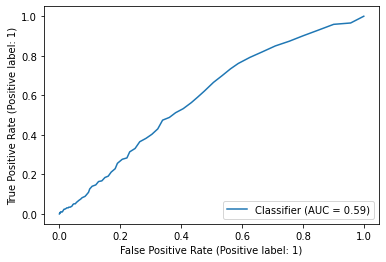

In [21]:
from sklearn.metrics import RocCurveDisplay
y_pred_proba = rf_model.predict_proba(test)
curve = RocCurveDisplay.from_predictions(y_test, y_pred_proba[:, 1])